# Write the dataframe

In [3]:
import pandas as pd

In [7]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [9]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [10]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Show certains columns

In [11]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [14]:
df[["    DATE", "   TG"]]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
...,...,...
59316,2022-05-27,-9999
59317,2022-05-28,-9999
59318,2022-05-29,-9999
59319,2022-05-30,-9999


# Simple statistics and filtering

In [16]:
df.loc[df['   TG'] != -9999]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [19]:
df.loc[df['   TG'] != -9999]['   TG'].max()/10

26.2

In [21]:
df.loc[df['   TG'] != -9999]['   TG'].min()/10

-28.8

<Axes: >

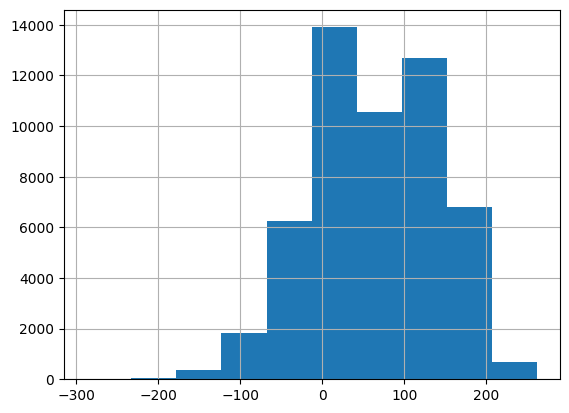

In [23]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

# Show certain cells

In [24]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [27]:
df.loc[df["    DATE"] == "1860-01-05"]['   TG'].squeeze() / 10

3.1

In [33]:
df.loc[df['   TG'] == df['   TG'].max()]["    DATE"].squeeze()

Timestamp('1868-08-16 00:00:00')

In [35]:
df.loc[3, '   TG']

37

# Calculate a new column out of an existing one

In [44]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG']==-9999, np.nan)

In [45]:
df["TG"] = df['   TG'] / 10

In [46]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,-1767.82,NaN


In [59]:
df["Fahrenheit"] = df["TG0"] / 10 * (9/5) + 32

<Axes: >

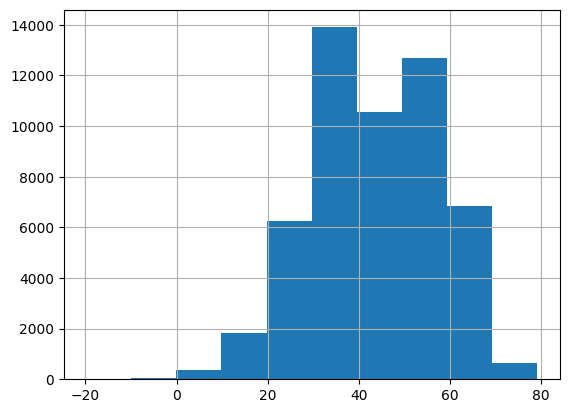

In [60]:
df["Fahrenheit"].hist()

# Plotting

<Axes: xlabel='    DATE'>

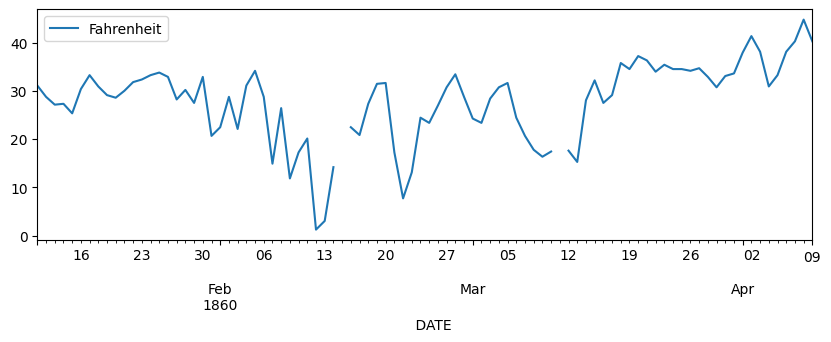

In [78]:
df[10:100].plot(x="    DATE", y="Fahrenheit", figsize=(10, 3))

In [40]:
df["Fahrenheit"] = df["TG"] * (9/5) + 32

In [5]:
stations = pd.read_csv("data_small/stations.txt", skiprows=17)

In [14]:
stations.columns

Index(['STAID', 'STANAME                                 ', 'CN', '      LAT',
       '       LON', 'HGHT'],
      dtype='object')

In [18]:
stations[:100]["STANAME                                 "]

0     VAEXJOE                                 
1     FALUN                                   
2     STENSELE                                
3     LINKOEPING                              
4     LINKOEPING-MALMSLAETT                   
                        ...                   
95    VY'TEGRA                                
96    VOLOGDA                                 
97    HAMMER ODDE FYR                         
98    VESTERVIG                               
99    NORDBY (FANO)                           
Name: STANAME                                 , Length: 100, dtype: object

In [25]:
stations_list = stations[:100][["STAID", "STANAME                                 "]]

In [45]:
station_id = stations_list.loc[stations_list["STAID"] == 5]["STAID"]

In [51]:
str(station_id.squeeze())

'5'